## Human Preference Dataset Usage

In [1]:
from utils import HumanPreferenceDatasetReader
import numpy as np

In [2]:
dataset_path = "/Users/dimitri/Git/stable-diffusion/align_sd/dataset"
# dataset_path = "./dataset"

In [3]:
train_reader = HumanPreferenceDatasetReader(dataset_path, split="train")

In [4]:
all_user_hashes = train_reader.get_all_user_hashes()

portrait of a gorgeous model posing for the camera, beautiful long swirly hair, shot in 1 9 8 0's, shot on kodak film, editorial, by robert capa
Preferred index: 1


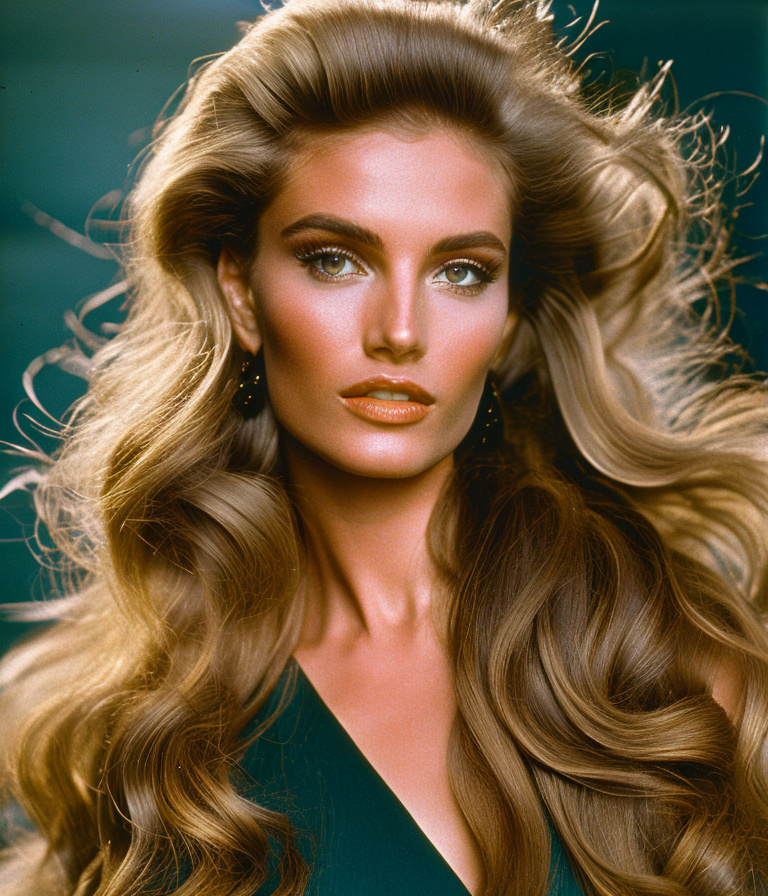

In [5]:
example = train_reader.get_random_example()
print(example["prompt"])
print(f"Preferred index: {example['human_preference']}")
example["images"][example["human_preference"]]

In [6]:
train_reader.get_data_by_id(1)

{'human_preference': 2,
 'prompt': 'an asian santa laying on top of clouds oil painting in the style of van gogh detailed 4 k',
 'id': 1,
 'file_path': ['preference_images/1_0.jpg',
  'preference_images/1_1.jpg',
  'preference_images/1_2.jpg',
  'preference_images/1_3.jpg'],
 'user_hash': 'bbdf89e1b93b7549e77f85ff26a55d213f98446e56723dd2ed51e4639c7c64fa',
 'contain_name': False}

In [7]:
all_prompts = train_reader.get_all_prompts()
all_prompts[:10]

['otherworldly alien skies',
 'an asian santa laying on top of clouds oil painting in the style of van gogh detailed 4 k',
 'science fiction city',
 'very complex hyper - maximalist overdetailed cinematic tribal darkfantasy closeup portrait of a malignant beautiful young dragon queen goddess megan fox with long black windblown hair and dragon scale wings, magic the gathering, pale skin and dark eyes, flirting smiling succubus confident seductive, gothic, windblown hair, vibrant high contrast, by andrei riabovitchev, tomasz alen kopera, moleksandra shchaslyva, peter mohrbacher, omnious intricate, octane, moebius, arney freytag, fashion photo shoot, glamorous pose, trending on artstation, dramatic lighting, ice, fire and smoke, orthodox symbolism diesel punk, mist, ambient occlusion, volumetric lighting, lord of the rings, bioshock, glamorous, emotional, tattoos, shot in the photo studio, professional studio lighting, backlit, rim lightingdeviant - art, hyper detailed illustration, 8 k',

In [8]:
user_hash = all_user_hashes[10]
user_hash

'55f1c5a8bd3e8381584580ba8a0cacf9dd9b43b42836f5f99f9ab5c3a863972d'

In [9]:
user_paths = train_reader.get_paths_by_user_hash(user_hash)

In [10]:
# get average number of paths of all users

num_paths = []
for user_hash in all_user_hashes:
    num_paths.append(len(train_reader.get_paths_by_user_hash(user_hash)))

np.mean(num_paths), np.max(num_paths), np.min(num_paths)

(3.91818856718634, 4, 2)

In [11]:
# iterate over all user ids, and add up the numbers (paths - 1), which is the number of positive and negative pairs

num_pairs = 0
for user_hash in all_user_hashes:
    num_pairs += len(train_reader.get_paths_by_user_hash(user_hash)) - 1

num_pairs

58962

## HPC Inference

In [12]:
from hpc import HumanPreferenceScore

In [13]:
model = HumanPreferenceScore()

100%|███████████████████████████████████████| 890M/890M [00:34<00:00, 27.4MiB/s]


FileNotFoundError: [Errno 2] No such file or directory: './weights/hpc.pt'

In [9]:
example = train_reader.get_example_by_id(42)
print(f"Preferred index: {example['human_preference']}")
model.compute(example["images"])

TypeError: 'NoneType' object is not subscriptable

In [7]:
image_path_1 = "/Users/lukas/Desktop/projects/diffusion/align_sd/assets/examples.png"
image_path_2 = "/Users/lukas/Desktop/projects/diffusion/align_sd/assets/vis1.png"
image_path_3 = "/Users/lukas/Desktop/projects/diffusion/align_sd/assets/vis2.png"

image_paths = [image_path_1, image_path_2, image_path_3]

model.compute_from_paths("example prompt", image_paths)

tensor([[0.1801],
        [0.1907],
        [0.1846]], device='mps:0', dtype=torch.float16)